<a href="https://colab.research.google.com/github/felladib/reconnaissance_vocale/blob/main/reconnaissance_vocale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install librosa pyaudio tensorflow

In [18]:
import tensorflow as tf
import numpy as np
import pandas as pd
import librosa
import IPython.display as ipd

In [3]:
from google.colab import files

# **Importation des données depuis KAGGLE**

In [4]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
# installer l'API kaggle
!pip install -q kaggle

In [6]:
# créer le dossier .kaggle et y deplacer kaggel.json pour l'authentification
!mkdir -p ~/.kaggle

In [7]:
# Cette commande déplace votre fichier kaggle.json, qui contient vos informations d'identification API Kaggle, dans le répertoire ~/.kaggle/ que vous venez de créer. Cela permet à l'environnement Kaggle de trouver vos informations d'identification lors de l'utilisation de l'API Kaggle.
!mv kaggle.json ~/.kaggle/

In [8]:
# Cette commande modifie les autorisations du fichier kaggle.json pour qu'il soit accessible en lecture et écriture uniquement par l'utilisateur propriétaire du fichier. Cela garantit que vos informations d'identification API Kaggle sont protégées contre les accès non autorisés.
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
# telecharger le jeu de données common voice de mozilla
!kaggle datasets download -d mozillaorg/common-voice

Dataset URL: https://www.kaggle.com/datasets/mozillaorg/common-voice
License(s): CC0-1.0
100% 12.0G/12.0G [07:18<00:00, 32.0MB/s]
100% 12.0G/12.0G [07:19<00:00, 29.5MB/s]


Le format principal de la dataset est le suivant :

**Enregistrements audio**: Les fichiers audio sont généralement au format WAV, bien que certains jeux de données puissent également inclure d'autres formats audio courants. Chaque fichier audio contient une personne parlant une phrase spécifique.

**Transcriptions textuelles** : Chaque enregistrement audio est associé à une transcription textuelle indiquant ce qui a été dit dans l'enregistrement. Ces transcriptions sont généralement fournies dans un fichier CSV ou un format similaire, où chaque ligne représente un enregistrement audio avec son texte correspondant.

filename, text
recording1.wav, "Le texte de la première phrase."

In [10]:
# Extraire le contenu du fichier zip
!unzip -q common-voice.zip -d common-voice

**Data description**

Each row of a csv file represents a single audio clip, and contains the following information:
filename - relative path of the audio file
text - supposed transcription of the audio
up_votes - number of people who said audio matches the text
down_votes - number of people who said audio does not match text
age - age of the speaker, if the speaker reported it
teens: '< 19'
twenties: '19 - 29'
thirties: '30 - 39'
fourties: '40 - 49'
fifties: '50 - 59'
sixties: '60 - 69'
seventies: '70 - 79'
eighties: '80 - 89'
nineties: '> 89'
gender - gender of the speaker, if the speaker reported it
male
female
other
accent - accent of the speaker, if the speaker reported it
us: 'United States English'
australia: 'Australian English'
england: 'England English'
canada: 'Canadian English'
philippines: 'Filipino'
hongkong: 'Hong Kong English'
indian: 'India and South Asia (India, Pakistan, Sri Lanka)'
ireland: 'Irish English'
malaysia: 'Malaysian English'
newzealand: 'New Zealand English'
scotland: 'Scottish English'
singapore: 'Singaporean English'
southatlandtic: 'South Atlantic (Falkland Islands, Saint Helena)'
african: 'Southern African (South Africa, Zimbabwe, Namibia)'
wales: 'Welsh English'
bermuda: 'West Indies and Bermuda (Bahamas, Bermuda, Jamaica, Trinidad)'
The audio clips for each subset are stored as mp3 files in folders with the same naming conventions as it’s corresponding csv file. So, for instance, all audio data from the valid train set will be kept in the folder “cv-valid-train” alongside the “cv-valid-train.csv” metadata file.

In [51]:
import os

# Lister les fichiers dans le répertoire cv-valid-train
audio_files = os.listdir('/content/common-voice/cv-valid-train/cv-valid-train')
print(len(audio_files))  # Afficher les 10 premiers fichiers pour vérification

195776


In [57]:
# charger le fichier csv des données d'entrainement
data = pd.read_csv('/content/common-voice/cv-valid-train.csv')

In [58]:
len(data)

195776

In [59]:
data.head()

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1,0,NaN,NaN,NaN,NaN
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,1,0,NaN,NaN,NaN,NaN
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,1,0,NaN,NaN,NaN,NaN
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,1,0,NaN,NaN,NaN,NaN
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,3,2,NaN,NaN,NaN,NaN


In [60]:
def ecouter_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)  # Charger le fichier audio
    return ipd.Audio(data=y, rate=sr)  # Retourner l'objet audio

In [54]:
exemple_audio = '/content/common-voice/cv-valid-train/' + train_df.iloc[2]['filename']
print(f'Écoute de : {exemple_audio}')
ipd.display(ecouter_audio(exemple_audio))
exemple_audio = '/content/common-voice/cv-valid-train/' + train_df.iloc[9]['filename']
print(f'Écoute de : {exemple_audio}')
ipd.display(ecouter_audio(exemple_audio))
exemple_audio = '/content/common-voice/cv-valid-train/' + train_df.iloc[5]['filename']
print(f'Écoute de : {exemple_audio}')
ipd.display(ecouter_audio(exemple_audio))

Écoute de : /content/common-voice/cv-valid-train/cv-valid-train/sample-000002.mp3


Écoute de : /content/common-voice/cv-valid-train/cv-valid-train/sample-000009.mp3


Écoute de : /content/common-voice/cv-valid-train/cv-valid-train/sample-000005.mp3


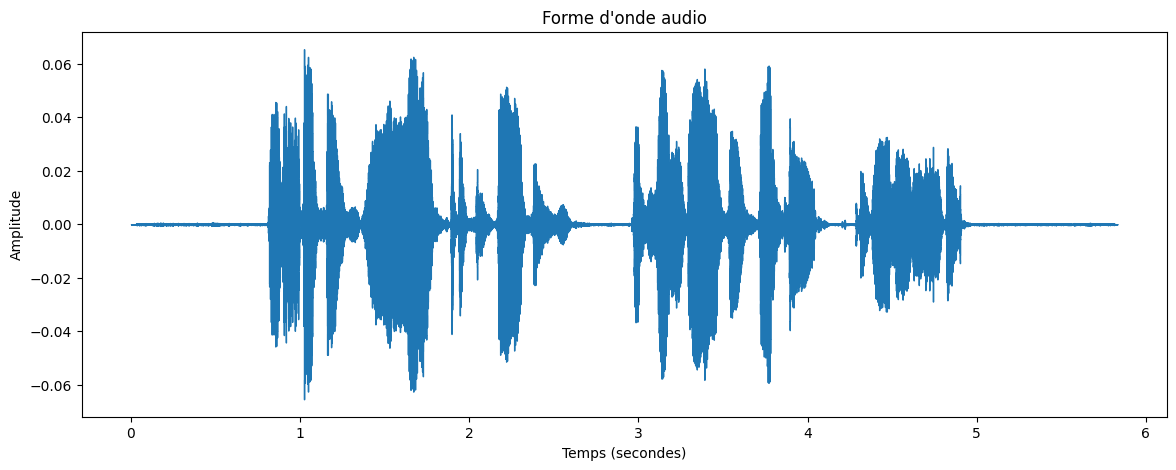

In [56]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Charger le fichier audio
audio_path = '/content/common-voice/cv-valid-train/cv-valid-train/sample-000005.mp3'
y, sr = librosa.load(audio_path, sr=None)

# Afficher la forme d'onde
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Temps (secondes)')
plt.ylabel('Amplitude')
plt.title('Forme d\'onde audio')
plt.show()


# **Prétraitement des Données**